<a href="https://colab.research.google.com/github/Gamearonx/Pre-Boot-Camp-2/blob/main/Decision_tree_obesity_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Setup and Data Preparation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/Obesity Classification.csv')

# Display basic info
print("First 5 rows of data:")
print(data.head())
print("\nDataset Info:")
print(data.info())

First 5 rows of data:
   ID  Age  Gender  Height  Weight   BMI          Label
0   1   25    Male     175      80  25.3  Normal Weight
1   2   30  Female     160      60  22.5  Normal Weight
2   3   35    Male     180      90  27.3     Overweight
3   4   40  Female     150      50  20.0    Underweight
4   5   45    Male     190     100  31.2          Obese

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB
None



Column names in the dataset:
['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label']

Assuming target column is: 'Label'


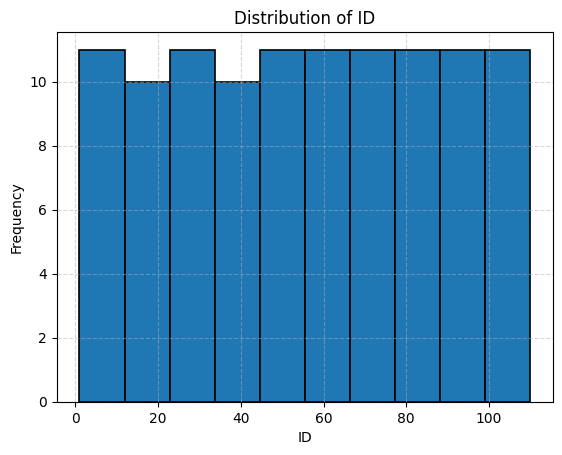

In [14]:
#. 2 List all columns to verify
print("\nColumn names in the dataset:")
print(data.columns.tolist())

# Auto-detect target column (assumes it's the last one)
target_col = data.columns[-1]
print(f"\nAssuming target column is: '{target_col}'")

# Automatically pick a numeric column (not the target) to plot
numeric_cols = data.select_dtypes(include='number').columns.tolist()
sample_col = [col for col in numeric_cols if col != target_col][0] if numeric_cols else None

# Plot histogram of a numeric feature (with borders)
if sample_col:
    data[sample_col].hist(edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of {sample_col}')
    plt.xlabel(sample_col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [15]:
# 3. Preprocessing
# Separate features and target
y = data[target_col]
X = data.drop(columns=[target_col])

# Encode categorical features
for col in X.select_dtypes(include='object').columns:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print(f"Target classes: {list(le_target.classes_)}")
else:
    le_target = None

Encoding column: Gender
Target classes: ['Normal Weight', 'Obese', 'Overweight', 'Underweight']


In [16]:
# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# 5. Decision Tree Construction
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
# 6. Model Evaluation
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


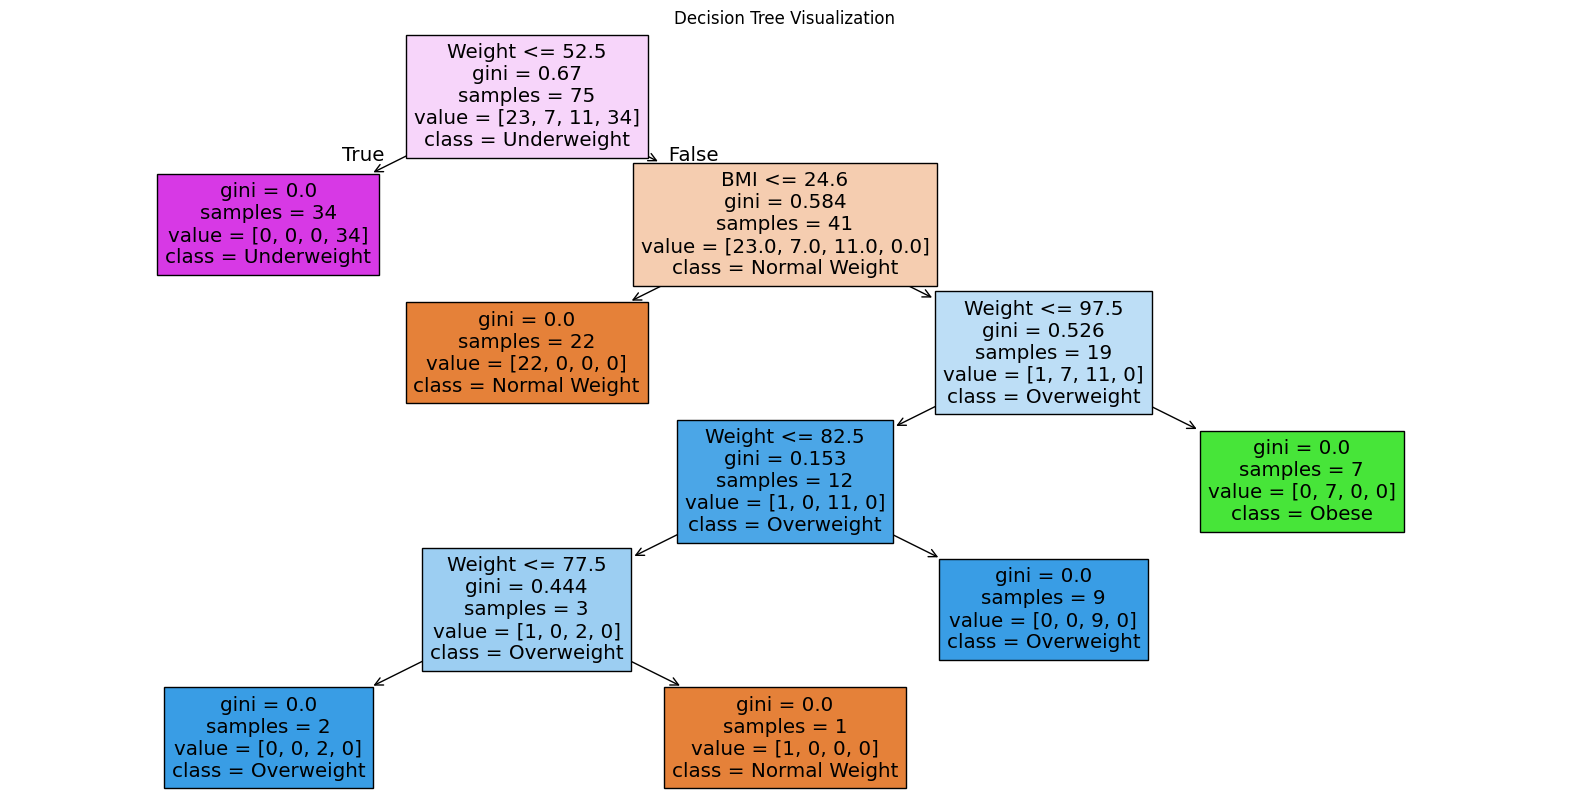

In [19]:
# 7. Visualize the Decision Tree
plt.figure(figsize=(20,10))
class_names = [str(cls) for cls in model.classes_]
if le_target:
    class_names = le_target.inverse_transform(model.classes_)
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in class_names], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [20]:
# 8. Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\nBest parameters from Grid Search:")
print(grid.best_params_)


Best parameters from Grid Search:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}


In [21]:
# Cross-validation score of the best model
best_model = grid.best_estimator_
cv_scores = cross_val_score(best_model, X, y, cv=5)

print("\nCross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [0.86363636 0.95454545 1.         1.         1.        ]
Mean CV accuracy: 0.9636363636363636
